In [31]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Find best batting Team 2010 - 2020

In [32]:
# Store filepath in a variable
batting_data = "Resources/Batting.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
batting_data = pd.read_csv(batting_data, encoding="ISO-8859-1")
batting_data.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [33]:
#filter data by year
batting_df = batting_data [(2009 < batting_data["yearID"]) & (batting_data["yearID"] < 2021)]
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
92866,aardsda01,2010,1,SEA,AL,53,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
92867,abadfe01,2010,1,HOU,NL,22,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
92868,abreubo01,2010,1,LAA,AL,154,573,88,146,41,...,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
92869,abreuto01,2010,1,ARI,NL,81,193,16,45,11,...,13.0,2.0,1.0,4,47.0,0.0,0.0,0.0,4.0,8.0
92870,accarje01,2010,1,TOR,AL,5,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#count amount of teams from 2010 - 2020
team = batting_df["teamID"].nunique()
team

31

In [35]:
#Change the name of columns needed
bat_team_df = batting_df[["teamID", "H", "R", "HR", "SO"]]
bat_renamed_df = bat_team_df.rename(columns={"teamID":"Team", "H": "Hits", "R":"Runs", "HR":"Home Runs", "SO":"Strike Outs"})
bat_renamed_df.head()


,Team,Hits,Runs,Home Runs,Strike Outs
92866,SEA,0,0,0,0.0
92867,HOU,0,0,0,1.0
92868,LAA,146,88,20,132.0
92869,ARI,45,16,1,47.0
92870,TOR,0,0,0,0.0


In [36]:
#Find the mean of hits, runs homeruns & strike outs
batting_group = bat_renamed_df.groupby("Team")
batting_group.head()
batting = batting_group.mean()
batting

,Hits,Runs,Home Runs,Strike Outs
Team,,,,
ARI,29.122153,15.047619,3.571429,27.672878
ATL,28.293878,14.097959,3.216327,25.979592
BAL,28.069721,14.011952,4.111554,25.527888
BOS,30.095618,16.139442,3.725100,24.416335
CHA,30.730853,14.857768,3.717724,27.875274
CHN,28.211499,14.501027,3.652977,27.691992
CIN,30.391685,15.301969,3.890591,28.251641
CLE,29.430672,15.298319,3.588235,25.397059
COL,31.816631,16.513859,3.972281,27.918977


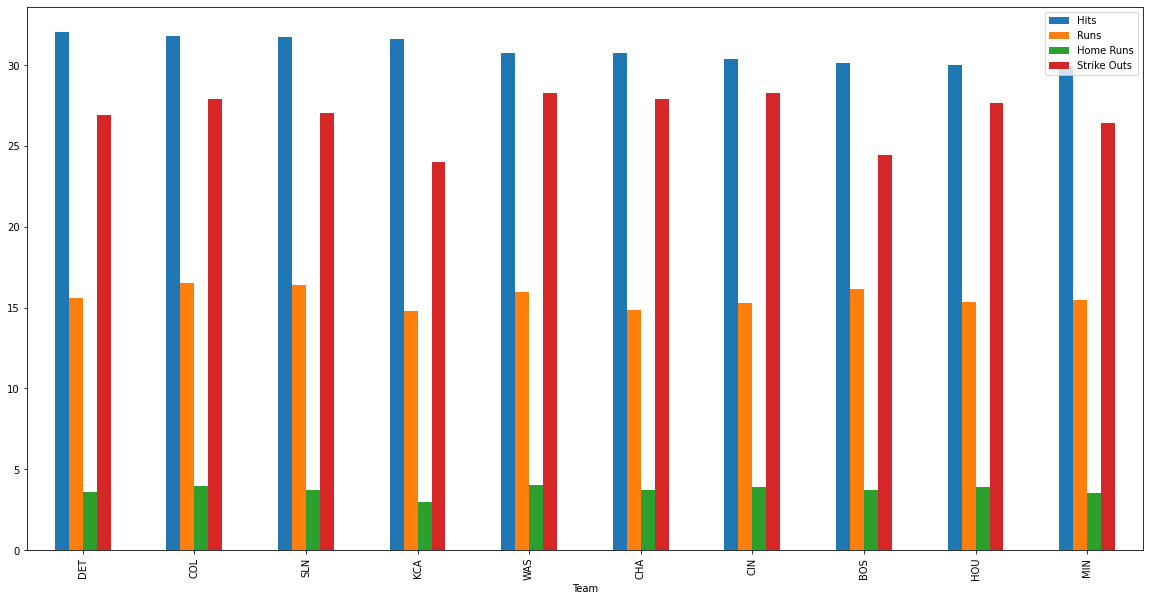

In [62]:
# Sort the DataFrame by the values in the "Runs" column to find the most
bat_hits = batting.sort_values("Hits", ascending=False)
top_ten = bat_hits.head(10) 

top_ten.plot(kind='bar', figsize=(20,10))
plt.show()

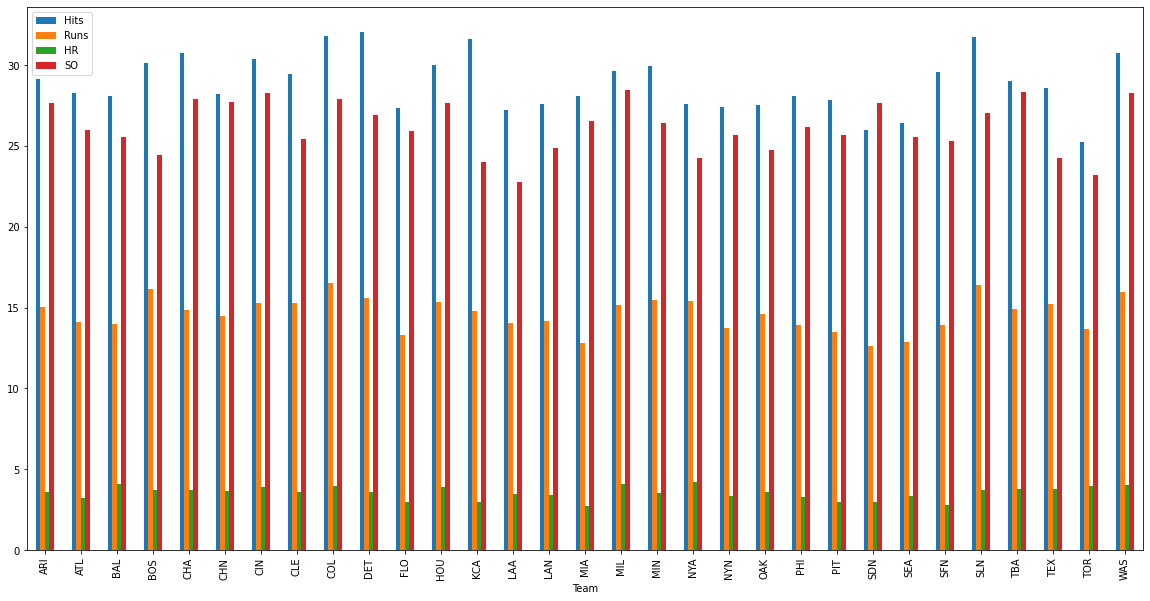

In [59]:
bat_teams = batting_df[["teamID", "H", "R"]]
bat_renamed1 = bat_team_df.rename(columns={"teamID":"Team", "H": "Hits", "R":"Runs"})
bat_renamed1.head()
bat_group = bat_renamed1.groupby("Team")
bat_group.head()
bat = bat_group.mean()
bat.head(10)




bat.plot(kind='bar', figsize=(20,10))
plt.show()

# Find Best Pitching Team 2010 - 2020

In [39]:
# Store filepath in a variable
pitching_data = "Resources/Pitching.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
pitching_data = pd.read_csv(pitching_data, encoding="ISO-8859-1")
pitching_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [40]:
#filter data by year
pitching_df = pitching_data [(2009 < pitching_data["yearID"]) & (pitching_data["yearID"] < 2021)]
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
39749,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0
39750,abadfe01,2010,1,HOU,NL,0,1,22,0,0,...,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0
39751,accarje01,2010,1,TOR,AL,0,1,5,0,0,...,0.0,2,1.0,0,34.0,2,6,0.0,0.0,2.0
39752,aceveal01,2010,1,NYA,AL,3,0,10,0,0,...,1.0,0,1.0,0,53.0,2,5,0.0,0.0,0.0
39753,acostma01,2010,1,NYN,NL,3,2,41,0,0,...,1.0,3,0.0,0,157.0,12,13,1.0,1.0,4.0


In [41]:
#Change the name of columns needed
pitch_team_df = pitching_df[["teamID", "W", "L", "H", "R", "HR", "SO"]]
pitch_renamed_df = pitch_team_df.rename(columns={"teamID":"Team", "W": "Wins", "L": "Losses", "H": "Hits", "R":"Runs", "HR":"Home Runs", "SO":"Strike Outs"})
pitch_renamed_df.head()

,Team,Wins,Losses,Hits,Runs,Home Runs,Strike Outs
39749,SEA,0,6,33,19,5,49
39750,HOU,0,1,14,6,3,12
39751,TOR,0,1,12,6,0,3
39752,NYA,3,0,10,5,1,2
39753,NYN,3,2,30,13,4,42


In [42]:
#Find the mean of hits, runs homeruns & strike outs
pitching_group = pitch_renamed_df.groupby("Team")
pitching_group.head()
pitching = pitching_group.mean()
pitching

,Wins,Losses,Hits,Runs,Home Runs,Strike Outs
Team,,,,,,
ARI,3.050000,3.180769,55.042308,27.969231,6.934615,48.900000
ATL,3.145522,2.895522,50.966418,25.145522,5.742537,47.712687
BAL,2.849057,3.264151,55.486792,29.335849,7.815094,44.286792
BOS,3.392996,2.910506,54.400778,28.202335,6.801556,52.350195
CHA,2.891051,3.408560,55.571984,29.116732,7.058366,48.284047
CHN,2.876761,2.827465,47.066901,24.292254,5.665493,46.489437
CIN,3.039216,3.313725,54.298039,28.239216,7.658824,49.721569
CLE,3.433735,3.064257,55.208835,27.538153,6.718876,53.722892
COL,2.937500,3.394531,58.996094,31.730469,7.148438,46.531250


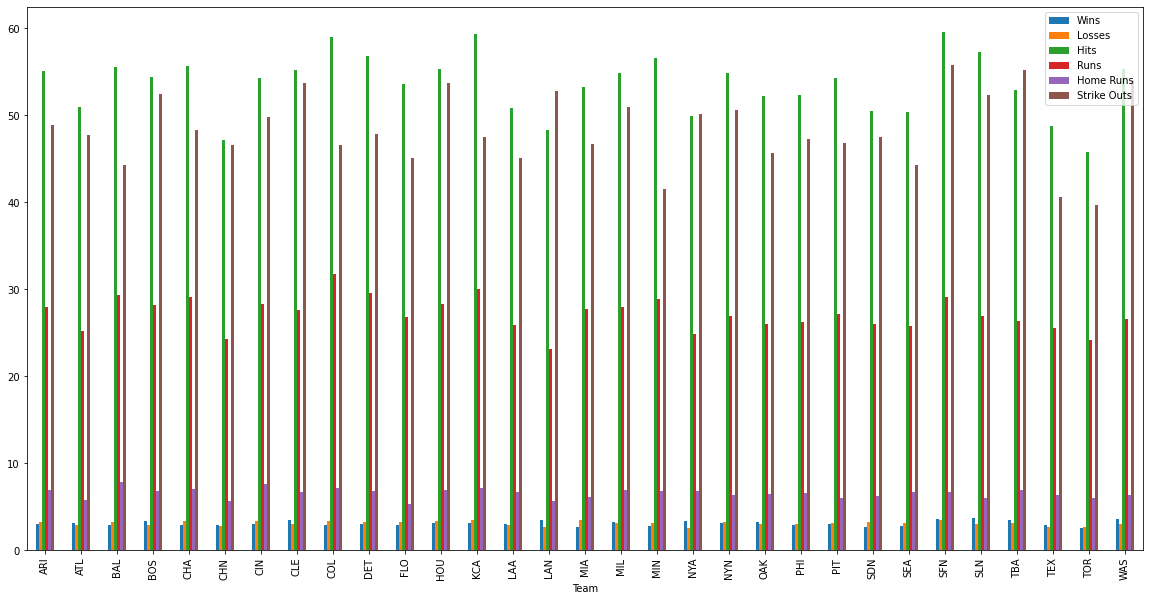

In [49]:
pitching.plot(kind='bar', figsize=(20,10))
plt.show()

# Wins/Losses 2010 - 2020

In [56]:
# Sort the DataFrame by the values in the "Wins" column to find the most
pitching_wins = pitching_df[["teamID", "W", "L"]]
pitching_wins_df = pitching_wins.rename(columns={"teamID":"Team", "W": "Wins", "L": "Losses"})
pitching_wins_df.head()

pitch_win_group = pitching_wins_df.groupby("Team")
pitch_win_group.head()
# pitching_wins = pitch_win_group.mean()
# pitching_wins

most_wins = pitching_wins_df.sort_values("Wins", ascending=False)
most_wins

,Team,Wins,Losses
41088,DET,24,5
43359,CHN,22,6
44733,BOS,22,4
39975,PHI,21,10
40290,NYA,21,7
...,...,...,...
43776,SEA,0,0
43786,ATL,0,1
43787,KCA,0,0
43788,ATL,0,3


In [53]:
most_wins.head()

,Wins,Losses
Team,,
SLN,3.730290,2.991701
WAS,3.602459,3.032787
SFN,3.600877,3.504386
TBA,3.495935,3.093496
LAN,3.454887,2.635338


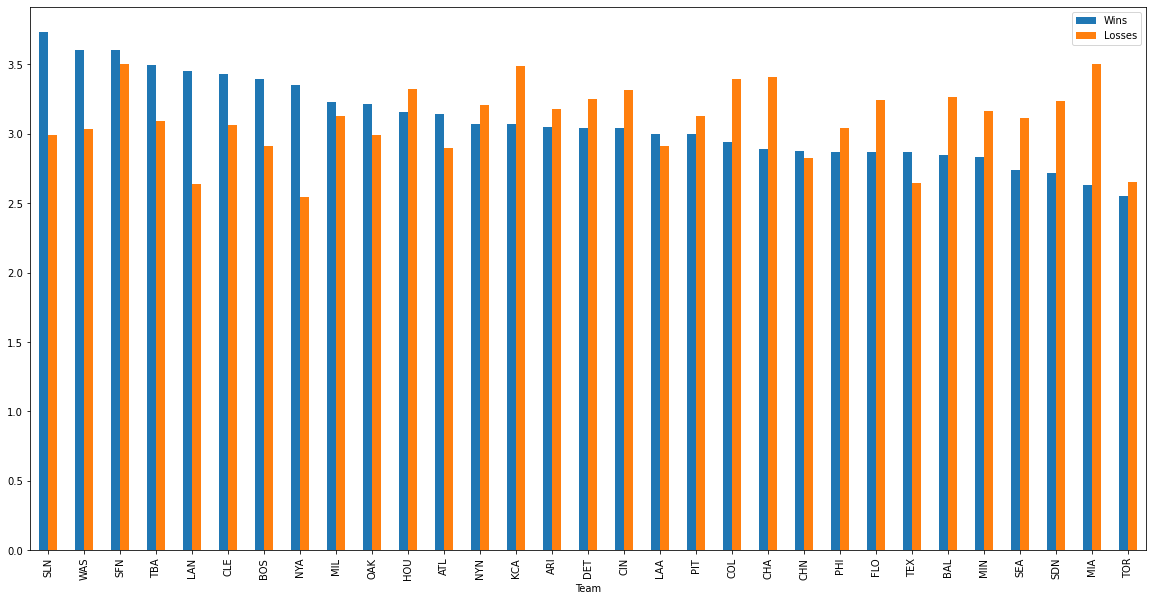

In [50]:
most_wins.plot(kind='bar', figsize=(20,10))
plt.show()

In [51]:
# Sort the DataFrame by the values in the "Losses" column to find the most
most_losses = pitching_wins.sort_values("Wins", ascending=False)
most_losses

,Wins,Losses
Team,,
SLN,3.730290,2.991701
WAS,3.602459,3.032787
SFN,3.600877,3.504386
TBA,3.495935,3.093496
LAN,3.454887,2.635338
CLE,3.433735,3.064257
BOS,3.392996,2.910506
NYA,3.349091,2.541818
MIL,3.231373,3.125490


In [54]:
most_losses.head()

,Wins,Losses
Team,,
SLN,3.730290,2.991701
WAS,3.602459,3.032787
SFN,3.600877,3.504386
TBA,3.495935,3.093496
LAN,3.454887,2.635338


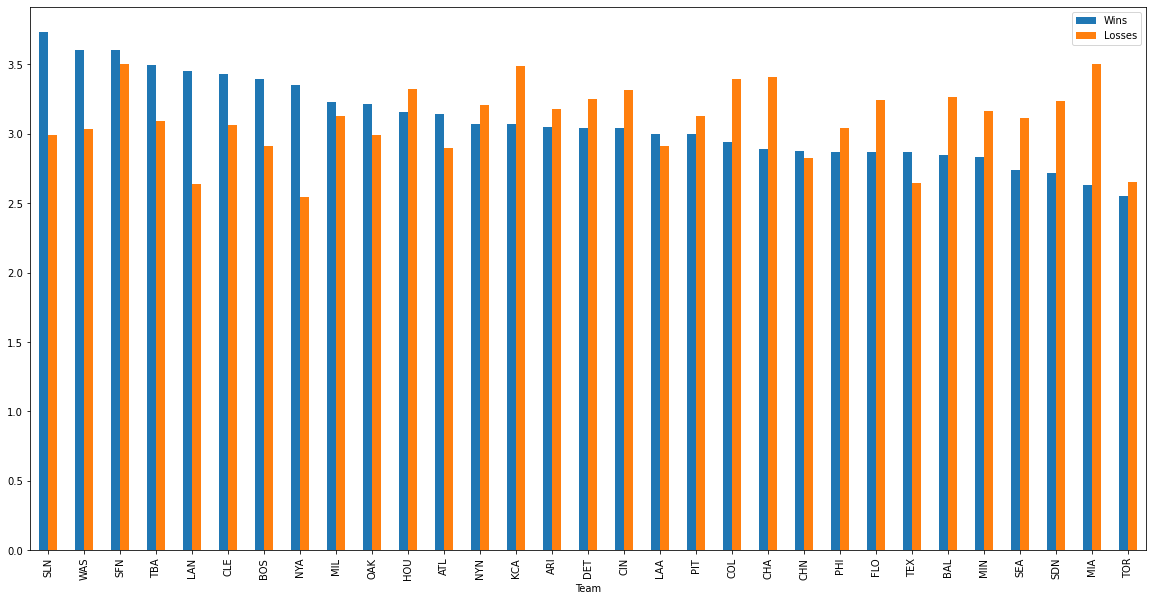

In [52]:
most_losses.plot(kind='bar', figsize=(20,10))
plt.show()